In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q9: Break down the total sales of items geographically (division-wise)

In [10]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT i.item_key,s.division,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              " GROUP BY (i.item_key,s.division) "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('I00001', 'BARISAL', Decimal('19101.5')),
 ('I00001', 'CHITTAGONG', Decimal('52060.5')),
 ('I00001', 'DHAKA', Decimal('107479.0')),
 ('I00001', 'KHULNA', Decimal('28382.0')),
 ('I00001', 'RAJSHAHI', Decimal('27795.5')),
 ('I00001', 'RANGPUR', Decimal('21597.0')),
 ('I00001', 'SYLHET', Decimal('15249.0')),
 ('I00002', 'BARISAL', Decimal('10118.25')),
 ('I00002', 'CHITTAGONG', Decimal('29592.00')),
 ('I00002', 'DHAKA', Decimal('61290.00')),
 ('I00002', 'KHULNA', Decimal('18191.25')),
 ('I00002', 'RAJSHAHI', Decimal('17131.50')),
 ('I00002', 'RANGPUR', Decimal('12129.75')),
 ('I00002', 'SYLHET', Decimal('8025.75')),
 ('I00003', 'BARISAL', Decimal('12251.25')),
 ('I00003', 'CHITTAGONG', Decimal('28471.50')),
 ('I00003', 'DHAKA', Decimal('59346.00')),
 ('I00003', 'KHULNA', Decimal('17367.75')),
 ('I00003', 'RAJSHAHI', Decimal('17502.75')),
 ('I00003', 'RANGPUR', Decimal('11900.25')),
 ('I00003', 'SYLHET', Decimal('7924.50')),
 ('I00004', 'BARISAL', Decimal('10766.25')),
 ('I00004', 'CHITT

In [11]:
df4 = pd.DataFrame(list(records), columns=['Item_Key', 'Division', 'total_price'])
df4

Item_Key    Division total_price
0      I00001     BARISAL     19101.5
1      I00001  CHITTAGONG     52060.5
2      I00001       DHAKA    107479.0
3      I00001      KHULNA     28382.0
4      I00001    RAJSHAHI     27795.5
...       ...         ...         ...
1843   I00264       DHAKA    132630.0
1844   I00264      KHULNA     37500.0
1845   I00264    RAJSHAHI     37725.0
1846   I00264     RANGPUR     27480.0
1847   I00264      SYLHET     17220.0

[1848 rows x 3 columns]

In [12]:
df4['total_price'] = pd.to_numeric(df4['total_price'],errors='coerce')

In [13]:
df4.dtypes

Item_Key        object
Division        object
total_price    float64
dtype: object

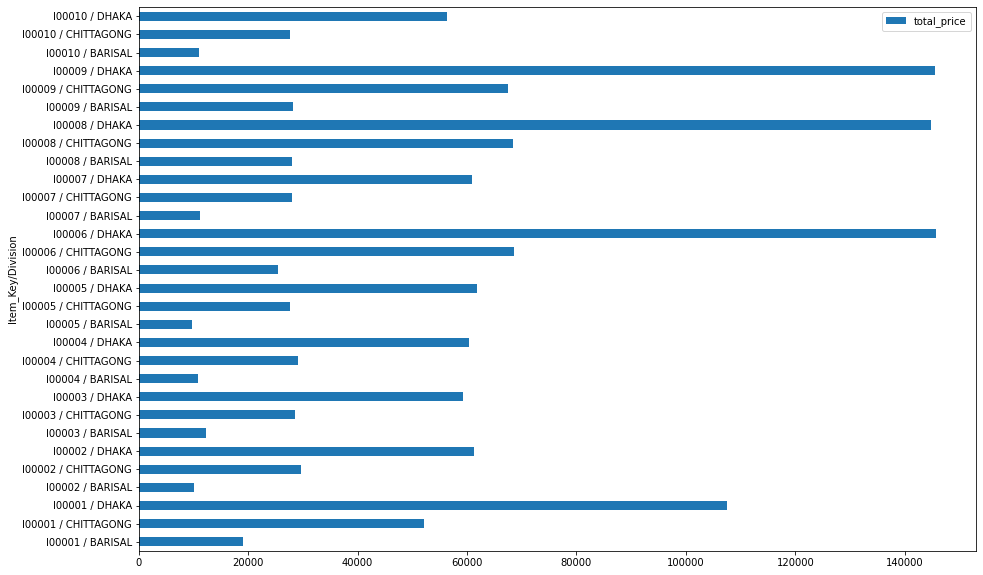

In [17]:
df4=df4.dropna()
df4 = df4.groupby('Item_Key').head(3)
df4= df4.head(30)
#df['total_price'] = df['total_price'].astype('int64')30)
df4['Item_Key/Division'] = df4['Item_Key'] + ' / ' + df4['Division']
fig = df4.plot.barh(x='Item_Key/Division', y='total_price', figsize=(15,10), rot=0)

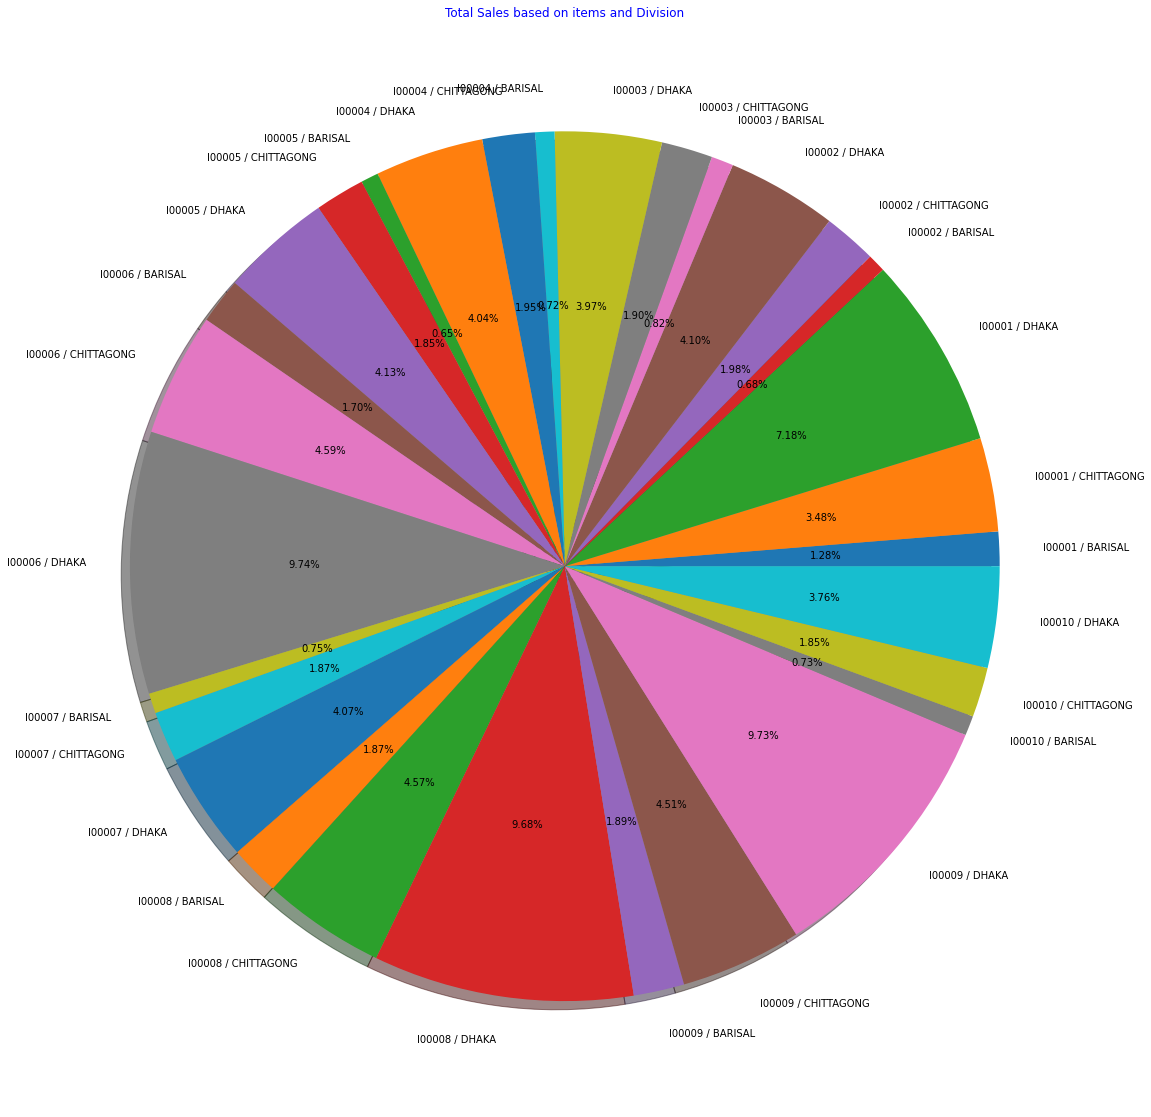

In [25]:
labels=df4['Item_Key/Division']
data = df4['total_price']
textprops = {"fontsize":10}
plt.title('Total Sales based on items and Division',loc='center',color='b')
plt.pie(data, labels=labels, shadow = True, textprops = textprops , autopct='%.2f%%')
plt.rcParams["figure.figsize"] = (30,20)
plt.show()